<a href="https://colab.research.google.com/github/Manmanhe1014/CAUserLogin/blob/main/JSC270_a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']
income94
#Part2-initial data exploration-1: Yes, they are. (detailed explanation below)
#According to the columns, age is countinous(we see age numbers instead of ranges), which aligns with the description provided.
#Workclass, education, marital-status, occupation, relationship, race, and native-country are all cateogorical, and the listed categories aligns with given ones in description.
#fnlwgt, education-num, capital-gain, capital-loss, and hours-per-weel are all datas that are continous, same as the given description.
#Sex is same as the binary type give by description, only male and female had been shown in the

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
income94[income94.select_dtypes(include=("object")).columns] = (
    income94.select_dtypes(include=("object")).replace(" ?", np.nan)
)
income94.replace(" ?", np.nan, inplace=True)
print(income94.isnull().sum())
#Part2-initial data exploration-2: The none value is represented as " ?" in this dataframe. There are 1836 missing value in workclass.
#There are 1843 missing value in occupation, and 583 missing value in native_country.

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64


<Axes: >

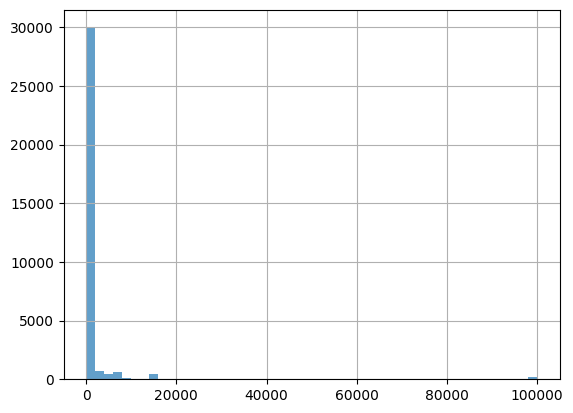

In [ ]:
income94["capital_gain"].hist(bins=50, alpha=0.7)
#Part2-initial data exploration-3: plot of capital_gain

<Axes: >

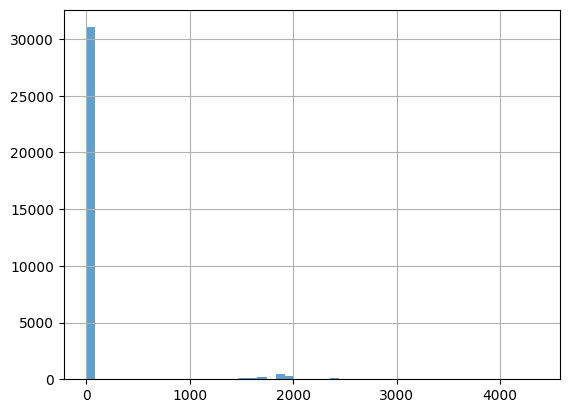

In [ ]:
income94["capital_loss"].hist(bins=50, alpha=0.7)
#plot of capital_loss

In [ ]:
income94["capital_gain_category"] = income94["capital_gain"].apply(lambda x: "high" if x > 0 else "low")
income94["capital_loss_category"] = income94["capital_loss"].apply(lambda x: "high" if x > 0 else "low")
#Yes we should make them categorical data, because most of the data is just 0, so we could categorize them into two categories.
#Create new two columns that each has two category.

<Axes: >

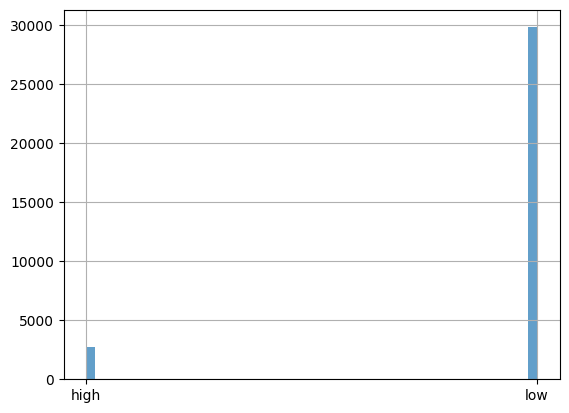

In [ ]:
income94["capital_gain_category"].hist(bins=50, alpha=0.7)
#The first plot.

<Axes: >

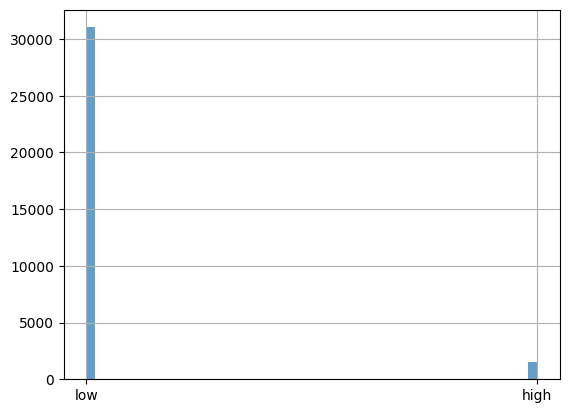

In [ ]:
income94["capital_loss_category"].hist(bins=50, alpha=0.7)
#The second plot

<Axes: title={'center': 'fnlwgt'}, xlabel='sex'>

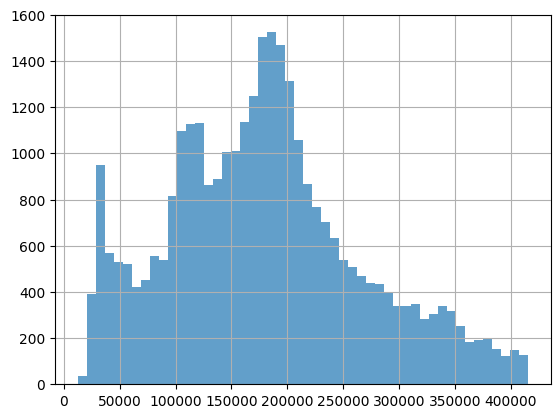

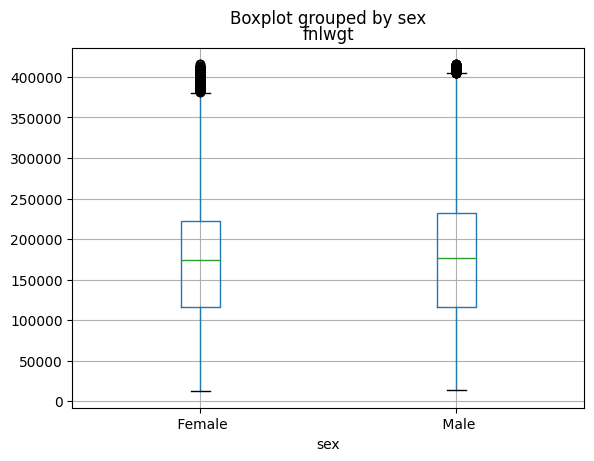

In [ ]:
income94["fnlwgt"].hist(bins=50, alpha=0.7)
#Part2-initial data exploration-4: No, this is not symmetric, it is right skewed.
income94.groupby("sex")["fnlwgt"].describe()
income94.boxplot(column="fnlwgt", by="sex")
#For female we have lower mean and std but we do have larger range. In this case, we should exclude outliers as they have affected
#the data since certains are unnormally high.

In [ ]:
Q1 = income94["fnlwgt"].quantile(0.25)
Q3 = income94["fnlwgt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (income94["fnlwgt"] < lower_bound) | (income94["fnlwgt"] > upper_bound)
income94.loc[outliers, "fnlwgt"] = np.nan
income94["fnlwgt"].isnull().sum()
#Use IQR to find the outliers then set them into missing values.

992

In [ ]:
income94[["age", "education_num", "hours_per_week"]].corr()
#Part2-correlation-1: age has a weak correlation with education_num and hours_per_week (as they are smaller than 0.1), and education_num
#has a stronger correlation with hours_per_week (as it is larger than 0.1), all these correlations are positive.

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


In [ ]:
#Part2-correlation-2

In [37]:
income94[income94["sex"] == " Male"][["education_num", "age"]].corr()

,education_num,age
education_num,1.000000,0.060486
age,0.060486,1.000000


In [36]:
income94[income94["sex"] == " Female"][["education_num", "age"]].corr()
#Part2-correlation-3: For male, the correlation between education_num and age is positive and weak, while for female is negative
#and weak. The result is partial in expectation, as for them all the correlation of age and education_num is already weak. Moreover,
#historically, female tend to have less access to education than male, so such negative correlation is reasonable.

,education_num,age
education_num,1.000000,-0.017899
age,-0.017899,1.000000


In [38]:
income94[["education_num", "hours_per_week"]].cov()
#Part2-correlation-4: There is a week relationship between education_num and hours_per_week, meaning as education years increase,
#hours work per week tend to increase slightly.

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


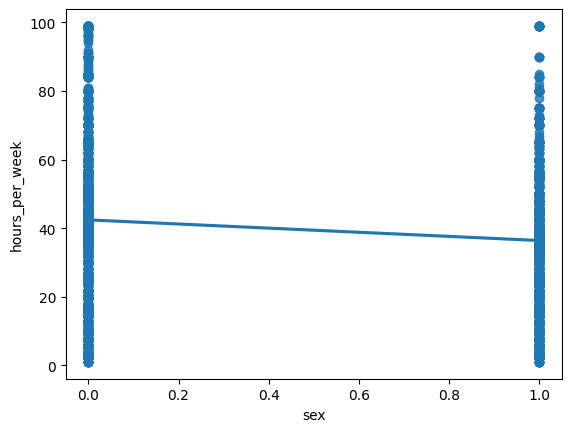

In [43]:
income94["sex_numeric"] = income94["sex"].map({" Male": 0, " Female": 1})
sns.regplot(x="sex_numeric", y="hours_per_week", data=income94)
plt.xlabel("sex")
plt.ylabel("hours_per_week")
plt.show()
#Part2-regression-1: From the regression line we can infer men has slightly more working time per week than female.

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:54:20   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            35.3815      0.271    130.613

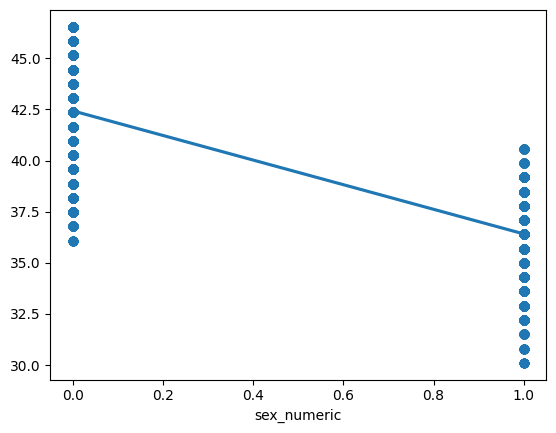

In [52]:
X_control = sm.add_constant(income94[["sex_numeric", "education_num"]])
Y = income94["hours_per_week"]
control_model = sm.OLS(Y, X_control).fit()
print(control_model.summary())
sns.regplot(x=income94["sex_numeric"], y=control_model.fittedvalues)
#Part2-regression-2: The trend remains unchanged, but male appears to work even more with education_num being added as control variable.


In [53]:
education_num_coeff = control_model.params["education_num"]
education_num_p_value = control_model.pvalues["education_num"]
education_num_conf_int = control_model.conf_int().loc["education_num"]
print("Coefficient of education_num:", education_num_coeff)
print("P-value of education_num:", education_num_p_value)
print("95% Confidence Interval of education_num:", education_num_conf_int)
#According to the result, the p value is smaller than 0.05 so it is statistically significant. The confidence interval is (0.6473, 0.7477)

Coefficient of education_num: 0.6974858382966189
P-value of education_num: 1.2755250641029187e-161
95% Confidence Interval of education_num: 0    0.647306
1    0.747666
Name: education_num, dtype: float64
